# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://www.google.com/maps/search/?api=1&parameters"

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                          

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gulu
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | mokhsogollokh
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | slave lake
Processing Record 7 of Set 1 | skelleftea
Processing Record 8 of Set 1 | saint anthony
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | itoman
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | lincoln
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | makakilo city
Processing Record 20 of Set 1 | outjo
Processing Record 21 of Set 1 | bandarbeyla
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of

Processing Record 33 of Set 4 | kailua
Processing Record 34 of Set 4 | seevetal
Processing Record 35 of Set 4 | cabo san lucas
Processing Record 36 of Set 4 | akhmim
Processing Record 37 of Set 4 | davila
Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | tainan
Processing Record 40 of Set 4 | champerico
Processing Record 41 of Set 4 | valparaiso
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | pocoes
Processing Record 44 of Set 4 | kjollefjord
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | zachagansk
City not found. Skipping...
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | fort nelson
Processing Record 0 of Set 5 | gloucester
Processing Record 1 of Set 5 | mareeba
Processing Record 2 of Set 5 | mailsi
Processing Record 3 of Set 5 | puerto del rosario
Processing Record 4 of Set 5 | dongsheng
Processing Record 5 of Set 5

Processing Record 20 of Set 8 | pousat
City not found. Skipping...
Processing Record 21 of Set 8 | high level
Processing Record 22 of Set 8 | nador
Processing Record 23 of Set 8 | byron bay
Processing Record 24 of Set 8 | maragogi
Processing Record 25 of Set 8 | shumskiy
Processing Record 26 of Set 8 | camopi
Processing Record 27 of Set 8 | grootfontein
Processing Record 28 of Set 8 | kulzeb
City not found. Skipping...
Processing Record 29 of Set 8 | bulaevo
Processing Record 30 of Set 8 | ust-ordynskiy
Processing Record 31 of Set 8 | beringovskiy
Processing Record 32 of Set 8 | panguna
Processing Record 33 of Set 8 | virginia beach
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | karabash
Processing Record 36 of Set 8 | aljezur
Processing Record 37 of Set 8 | khonuu
City not found. Skipping...
Processing Record 38 of Set 8 | moose factory
Processing Record 39 of Set 8 | sanmihaiu de campie
City not found. Skipping...
Processing R

Processing Record 7 of Set 12 | avera
Processing Record 8 of Set 12 | port augusta
Processing Record 9 of Set 12 | cayenne
Processing Record 10 of Set 12 | hovd
Processing Record 11 of Set 12 | mrirt
City not found. Skipping...
Processing Record 12 of Set 12 | pakwach
City not found. Skipping...
Processing Record 13 of Set 12 | wad rawah
Processing Record 14 of Set 12 | nea peramos
Processing Record 15 of Set 12 | cooma
Processing Record 16 of Set 12 | savannah bight
Processing Record 17 of Set 12 | vallenar
Processing Record 18 of Set 12 | yopal
Processing Record 19 of Set 12 | puerto pinasco
City not found. Skipping...
Processing Record 20 of Set 12 | touros
Processing Record 21 of Set 12 | berbera
Processing Record 22 of Set 12 | mbini
Processing Record 23 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 24 of Set 12 | cody
Processing Record 25 of Set 12 | mbarara
Processing Record 26 of Set 12 | ust-tsilma
Processing Record 27 of Set 12 | moron
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gulu,2.7746,32.2990,64.18,62,15,3.20,UG,1669944618
1,albany,42.6001,-73.9662,35.64,63,97,1.01,US,1669944474
2,bengkulu,-3.8004,102.2655,79.11,80,100,4.03,ID,1669944619
3,mokhsogollokh,61.4681,128.9203,-19.25,94,100,3.24,RU,1669944619
4,busselton,-33.6500,115.3333,67.57,54,0,2.21,AU,1669944322


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gulu,2.7746,32.2990,64.18,62,15,3.20,UG,1669944618
1,albany,42.6001,-73.9662,35.64,63,97,1.01,US,1669944474
2,bengkulu,-3.8004,102.2655,79.11,80,100,4.03,ID,1669944619
3,mokhsogollokh,61.4681,128.9203,-19.25,94,100,3.24,RU,1669944619
4,busselton,-33.6500,115.3333,67.57,54,0,2.21,AU,1669944322


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

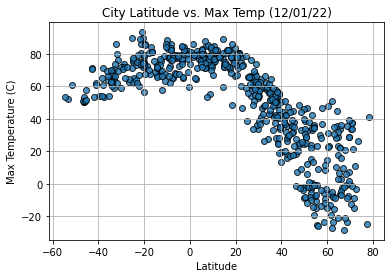

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

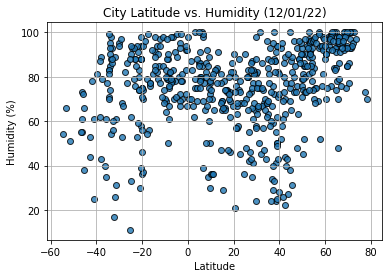

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

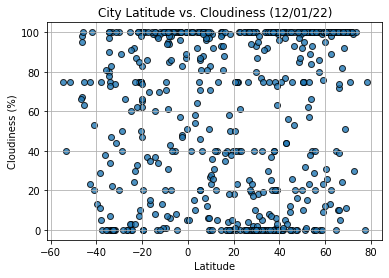

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

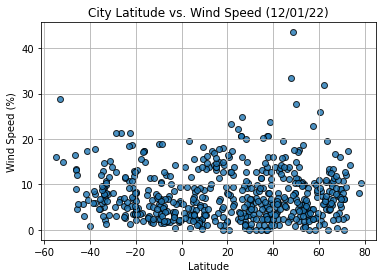

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gulu,2.7746,32.2990,64.18,62,15,3.20,UG,1669944618
1,albany,42.6001,-73.9662,35.64,63,97,1.01,US,1669944474
3,mokhsogollokh,61.4681,128.9203,-19.25,94,100,3.24,RU,1669944619
5,slave lake,55.2834,-114.7690,-14.82,84,0,2.30,CA,1669944620
6,skelleftea,64.7507,20.9528,28.76,100,100,6.91,SE,1669944622


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bengkulu,-3.8004,102.2655,79.11,80,100,4.03,ID,1669944619
4,busselton,-33.6500,115.3333,67.57,54,0,2.21,AU,1669944322
8,hermanus,-34.4187,19.2345,61.81,83,97,12.88,ZA,1669944624
10,mataura,-46.1927,168.8643,50.49,61,95,9.01,NZ,1669944625
13,hithadhoo,-0.6000,73.0833,80.96,67,5,6.42,MV,1669944488


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7242475781690941


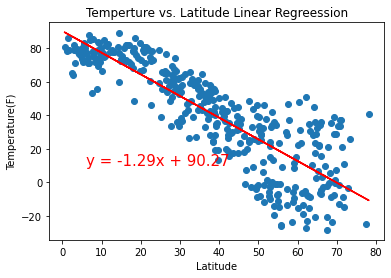

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype('float')
y_values = northern_hemi_df['Max Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title('Temperture vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()

R squared: 0.349796262998009


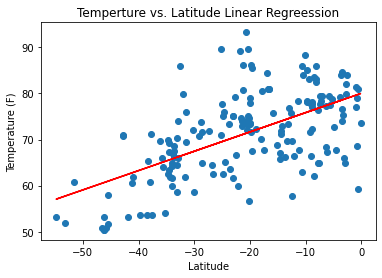

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype('float')
y_values = southern_hemi_df['Max Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperture vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.12461012317331123


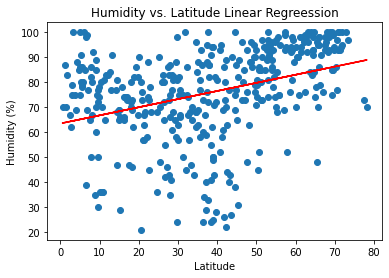

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype('float')
y_values = northern_hemi_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()


R squared: 0.11209484542491883


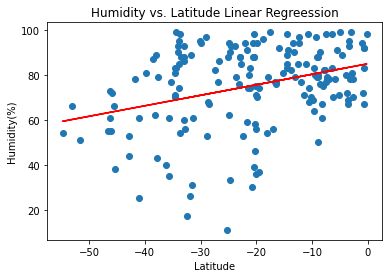

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype('float')
y_values = southern_hemi_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Humidity vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.040596544119838915


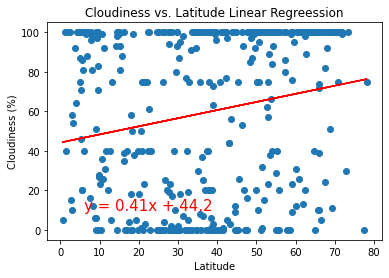

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype('float')
y_values = northern_hemi_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()


R squared: 0.04154830246690532


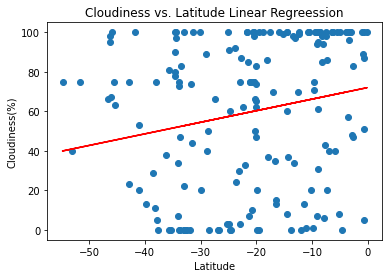

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype('float')
y_values = southern_hemi_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()





**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0011513037735359898


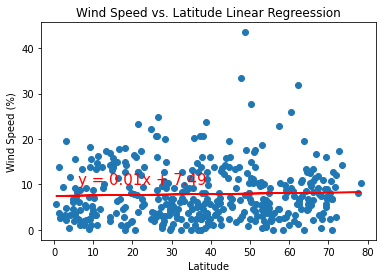

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].astype('float')
y_values = northern_hemi_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title('Wind Speed vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()


R squared: 0.10397585890754547


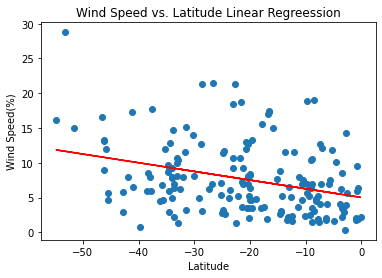

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].astype('float')
y_values = southern_hemi_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(%)')
plt.title('Wind Speed vs. Latitude Linear Regreession')
print(f"R squared: {rvalue**2}")
plt.show()




**Discussion about the linear relationship:** YOUR RESPONSE HERE